  Country name                                
  Regional indicator                          
  Ladder score                                
  Standard error of ladder score              
  upperwhisker                                
  lowerwhisker                                
  Logged GDP per capita                       
  Social support                              
  Healthy life expectancy                     
  Freedom to make life choices                
  Generosity                                  
  Perceptions of corruption                   
  Ladder score in Dystopia                    
  Explained by: Log GDP per capita            
  Explained by: Social support                
  Explained by: Healthy life expectancy       
  Explained by: Freedom to make life choices  
  Explained by: Generosity                    
  Explained by: Perceptions of corruption     
  Dystopia + residual                         

In [1]:
import pandas as pd
import numpy as np

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns


In [28]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)

In [74]:
df = pd.read_csv('world-happiness-report-2021.csv')

In [75]:
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.430,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.430,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.430,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.430,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.430,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.430,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.430,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.430,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.430,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [76]:
df.shape

(149, 20)

In [77]:
df = df.rename(columns={'Country name': 'Country', 
                   'Regional indicator': 'Region',
                   'Ladder score':'Ladder_score', 
                   'Standard error of ladder score':'Ladder_score_SE',
                   'Logged GDP per capita': 'GDP',
                   'Freedom to make life choices':'Freedom'})

In [78]:
df.shape

(149, 20)

In [79]:
df.head(1)

,Country,Region,Ladder_score,Ladder_score_SE,upperwhisker,lowerwhisker,GDP,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.430,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     149 non-null    object 
 1   Region                                      149 non-null    object 
 2   Ladder_score                                149 non-null    float64
 3   Ladder_score_SE                             149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   GDP                                         149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom                                     149 non-null    float64
 10  Generosity    

In [81]:
df.describe()

,Ladder_score,Ladder_score_SE,upperwhisker,lowerwhisker,GDP,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,5.533,0.059,5.648,5.418,9.432,0.815,64.993,0.792,-0.015,0.727,2.430,0.977,0.793,0.520,0.499,0.178,0.135,2.430
std,1.074,0.022,1.054,1.095,1.159,0.115,6.762,0.113,0.151,0.179,0.000,0.405,0.259,0.213,0.138,0.098,0.114,0.538
min,2.523,0.026,2.596,2.449,6.635,0.463,48.478,0.382,-0.288,0.082,2.430,0.000,0.000,0.000,0.000,0.000,0.000,0.648
25%,4.852,0.043,4.991,4.706,8.541,0.750,59.802,0.718,-0.126,0.667,2.430,0.666,0.647,0.357,0.409,0.105,0.060,2.138
50%,5.534,0.054,5.625,5.413,9.569,0.832,66.603,0.804,-0.036,0.781,2.430,1.025,0.832,0.571,0.514,0.164,0.101,2.509
75%,6.255,0.070,6.344,6.128,10.421,0.905,69.600,0.877,0.079,0.845,2.430,1.323,0.996,0.665,0.603,0.239,0.174,2.794
max,7.842,0.173,7.904,7.780,11.647,0.983,76.953,0.970,0.542,0.939,2.430,1.751,1.172,0.897,0.716,0.541,0.547,3.482


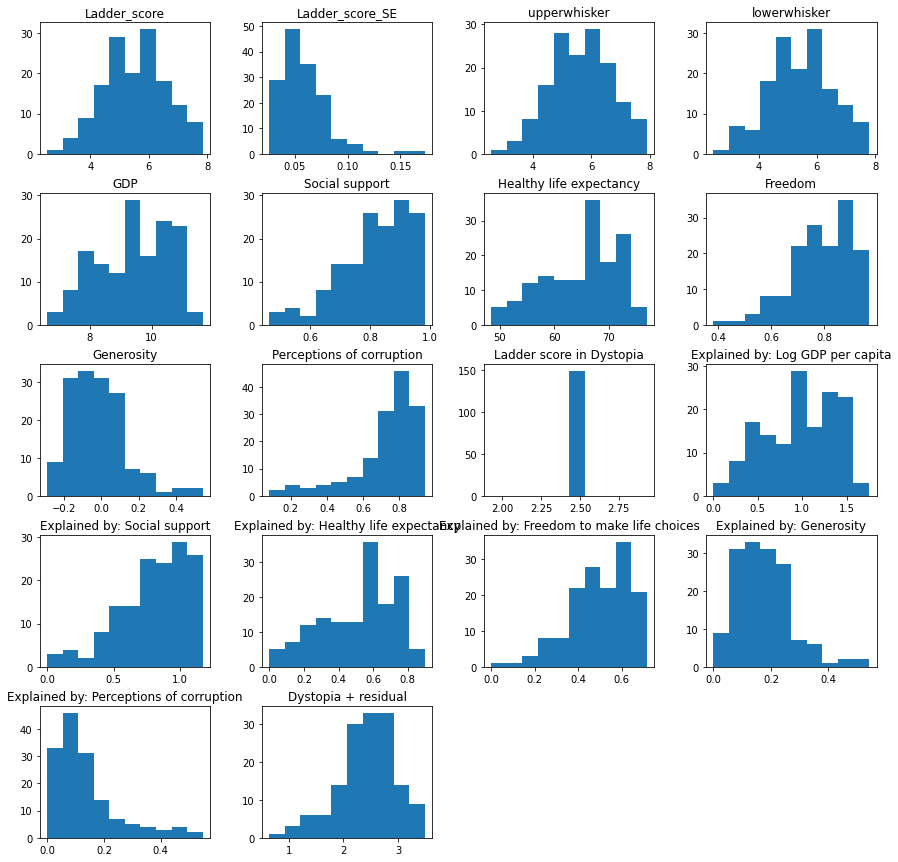

In [82]:
# Print histograms for each feature to see how they vary.
histograms = df.hist(grid=False, figsize=(15, 15))

<AxesSubplot:>

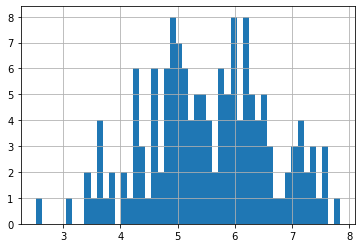

In [83]:
df['Ladder_score'].hist(bins=50)

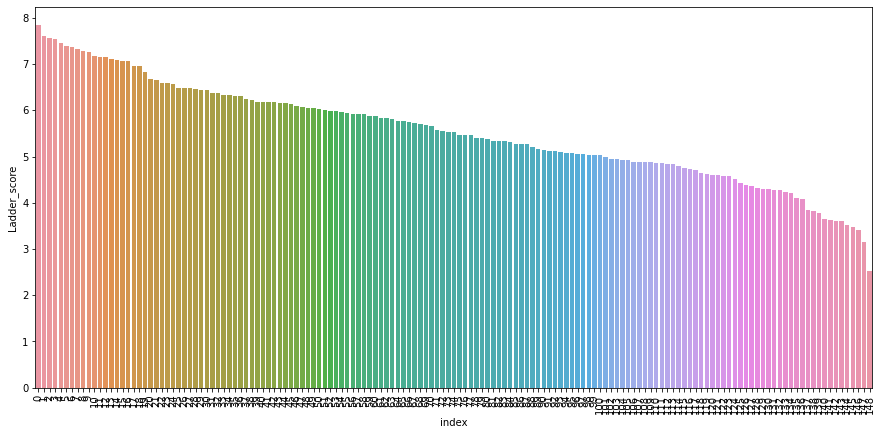

In [84]:
target = df['Ladder_score'].reset_index()
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='Ladder_score', data=target)
ax.xaxis.set_tick_params(rotation=90)

In [85]:
df.head(1)

,Country,Region,Ladder_score,Ladder_score_SE,upperwhisker,lowerwhisker,GDP,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.430,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [87]:
df.groupby('Region')['Ladder_score'].median()

Region
Central and Eastern Europe           6.078
Commonwealth of Independent States   5.472
East Asia                            5.761
Latin America and Caribbean          5.992
Middle East and North Africa         4.887
North America and ANZ                7.143
South Asia                           4.934
Southeast Asia                       5.384
Sub-Saharan Africa                   4.616
Western Europe                       7.085
Name: Ladder_score, dtype: float64

In [88]:
df.groupby('Region')['Ladder_score'].mean()

Region
Central and Eastern Europe           5.985
Commonwealth of Independent States   5.467
East Asia                            5.810
Latin America and Caribbean          5.908
Middle East and North Africa         5.220
North America and ANZ                7.129
South Asia                           4.442
Southeast Asia                       5.408
Sub-Saharan Africa                   4.494
Western Europe                       6.915
Name: Ladder_score, dtype: float64

## Koreliacija

In [90]:
df.head(1)

,Country,Region,Ladder_score,Ladder_score_SE,upperwhisker,lowerwhisker,GDP,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.430,1.446,1.106,0.741,0.691,0.124,0.481,3.253


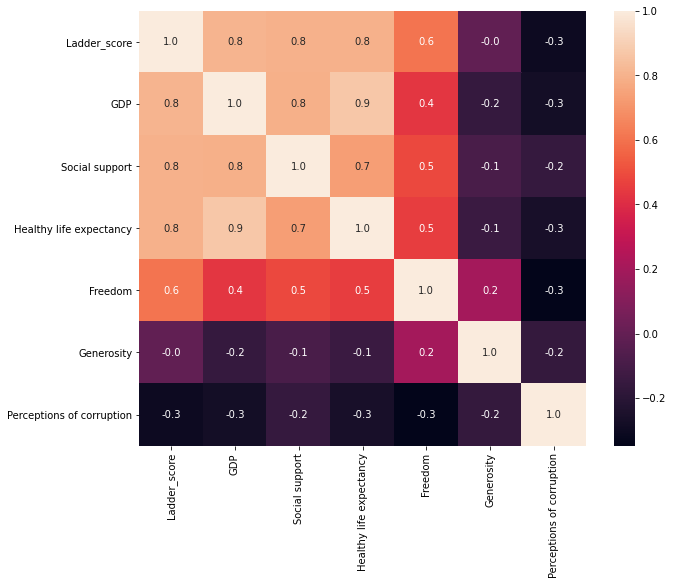

In [92]:
num_cols = ['Ladder_score', 'GDP', 'Social support', 'Healthy life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(10, 8))

sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, fmt=".1f");